In [1]:
import numpy as np
import pandas as pd


In [42]:
#%matplotlib qt5
#%matplotlib
#%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [36]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

ImportError: cannot import name 'options'

In [3]:
from LayerModel5 import *

In [4]:
from frame import *

In [5]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [7]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [8]:
dt_df.tail()

,open,high,low,close,datetime
1597,17.50,17.61,17.50,17.60,2019-01-16 11:30
1598,17.59,17.64,17.56,17.62,2019-01-16 13:30
1599,17.62,17.71,17.62,17.70,2019-01-16 14:00
1600,17.70,17.74,17.64,17.69,2019-01-16 14:30
1601,17.69,17.70,17.63,17.64,2019-01-16 15:00


In [9]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [6]:
dt_df = pd.read_csv('data_csv\\603799.XSHG.csv',index_col=0,parse_dates=True)

In [7]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [8]:
dt_df.head()

,open,volume,high,low,close,total_turnover,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,23.0560,995930.0,23.1326,23.0100,23.0176,23049694.0,0
2019-01-02 09:40:00,23.0176,698906.0,23.0406,22.9103,22.9640,16118445.0,1
2019-01-02 09:45:00,22.9640,570908.0,23.0560,22.9563,22.9870,13180271.0,2
2019-01-02 09:50:00,22.9870,807439.0,23.0560,22.9180,23.0560,18621408.0,3
2019-01-02 09:55:00,23.0560,625118.0,23.1863,23.0023,23.0176,14496614.0,4


## get data list

In [9]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [10]:
idx.shape

NameError: name 'idx' is not defined

In [12]:
idx.head()

,datetime,TmIdx,date_str
0,2019-01-02 09:35:00,0,01-02 09:35
1,2019-01-02 09:40:00,1,01-02 09:40
2,2019-01-02 09:45:00,2,01-02 09:45
3,2019-01-02 09:50:00,3,01-02 09:50
4,2019-01-02 09:55:00,4,01-02 09:55


### Find Market Open

In [16]:
idx['internal'] = idx['datetime'].diff()

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Get 属性数据

In [10]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.lv_L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.lv_L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [11]:
m = Market(4)
Stick.mm = m
Trend.m = m
Pair.m = m
PairChain.m = m

In [12]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [13]:
Stick.lv_L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))

In [14]:
TrendLv1 = type('TrendLv1', (Trend,), {'lv_L':m.Lv1_L, 'ML':Stick.lv_L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'lv_L':m.Lv2_L, 'ML':TrendLv1.lv_L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'lv_L':m.Lv3_L, 'ML':TrendLv2.lv_L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 23.055999999999997, 0))

In [15]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regSignal()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regSignal()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regSignal()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [16]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [17]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [18]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [19]:
PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()

In [20]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
   [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend2(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend3(0, 0, Point(0.0, 23.055999999999997, 0))],
   []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x1940bda0>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[<__main__.Pattern01Lv0 at 0x1981f0f0>,
   [],
   []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x1940bda0>],
 'MPLv0_L': [],
 'PT01Lv0_L': [<__main__.Pattern01Lv0 at 0x1981f0f0>,
 'Lv1_L': [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv1_L': [<LayerModel5.PairChain at 0x19811e80>],
 'MPLv1_L': [],
 'PT01Lv1_L': [<__m

In [21]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv1_L[-1]', 'm.PCLv0_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': ['updateAll'],
    'obj_p': ['Pattern01Lv0'],
    'param': ['']}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv1_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv1_L'],
    'param': ['m.PLv1_L[-1]']}},
  'PairCha

In [22]:
Position.m = m
Position.L = m.position

In [23]:
main()

TmIdx:5.0,[[<frame.Event object at 0x0000000019811D68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9.0,[[<frame.Event object at 0x0000000019811320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
TmIdx:10.0,[[<frame.Event object at 0x0000000019811780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 0],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 1],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:12.0,[[<frame.Event object at 0x0000000019811EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13.0,[[<frame.Event object at 0x0000000019811518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14.0,[[<frame.Event object at 0x00000000198111D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeak

test:PP.cursor()__start_cursor:[1, 8],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
TmIdx:192.0,[[<frame.Event object at 0x000000001984E7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[20, 21, 22, 23, 24, 25, 26, 27]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[20, 21, 22, 23, 24, 25, 26, 27, 28]
m.PCLv0_L[0].update2()
TmIdx:192.0,[[<frame.Event object at 0x000000001984E898>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:193.0,[[<frame.Event object at 0x000000001984E160>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 7],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 8],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:197.0,

test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
TmIdx:301.0,[[<frame.Event object at 0x0000000019848DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:302.0,[[<frame.Event object at 0x0000000019848F60>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:313.0,[[<frame.Event object at 0x000000001985C128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[42, 43, 44, 45, 46]
m.PCLv0_L[0].update2()
TmIdx:313.0,[[<frame.Event object at 0x0000000019848F60>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:314.0,[[<frame.Event object at 0x000000001985C240>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 11],layer_cha

test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:442.0,[[<frame.Event object at 0x00000000198733C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[61, 62, 63, 64, 65, 66, 67]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (437.0, 22.3891, 1)),peak(425.0, 22.6267, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[61, 62, 63, 64, 65, 66, 67, 68]
m.PCLv0_L[0].update2()
TmIdx:443.0,[[<frame.Event object at 0x0000000019873390>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 11],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cur

test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 21],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 22],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
TmIdx:542.0,[[<frame.Event object at 0x000000001987CE80>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 3],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:543.0,[[<frame.Event object at 0x000000001987C320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:545.0,[[<frame.Event object at 0x000000001987C630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:546.0,[[<frame.Event object at 0x000000001987CEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:547.0,[[<fr

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[93, 94, 95, 96, 97]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (655.0, 22.8567, 1)),peak(657.0, 22.8797, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[93, 94, 95, 96, 97, 98]
m.PCLv0_L[0].update2()
m.position[4].open_position(m.dt[-1])
TmIdx:662.0,[[<frame.Event object at 0x000000001988EB70>, <frame.Event object at 0x000000001988E390>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 14],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 24],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 25],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:664.0,[[<frame.Event object at 0x000000001988E470>]]
(0, Stick, 

test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 28],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
TmIdx:749.0,[[<frame.Event object at 0x000000001989B3C8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:750.0,[[<frame.Event object at 0x000000001989B128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:751.0,[[<frame.Event object at 0x000000001989B400>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:755.0,[[<frame.Event object at 0x000000001989BC18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[111, 112, 

test:PP.cursor()__start_cursor:[1, 37],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 35],layer_chain:2,w:2
TmIdx:892.0,[[<frame.Event object at 0x00000000198B0080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:895.0,[[<frame.Event object at 0x00000000198B01D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:896.0,[[<frame.Event object at 0x00000000198B06D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:901.0,[[<frame.Event object at 0x00000000198B00B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:902.0,[[<frame.Event object at 0x00000000198B02B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:905.0,[[<frame.Event object at 0x00000000198B0C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:908.0,[[<frame.Event object at 0x00000000198B0400>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:909.0,[[<frame.Event object at 0x00000000198B0240>]]
(0, Stick, PEAK)

TmIdx:972.0,[[<frame.Event object at 0x00000000198BB2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[145, 146, 147, 148]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[145, 146, 147, 148, 149]
m.PCLv0_L[0].update2()
TmIdx:972.0,[[<frame.Event object at 0x00000000198BB208>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:974.0,[[<frame.Event object at 0x00000000198BBBE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:976.0,[[<frame.Event object at 0x00000000198BB278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:977.0,[[<frame.Event object at 0x00000000198BB9E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:979.0,[[<frame.Event object at 0x00000000198BB4E0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:982.0,[[<frame.Event object at 0x00000000198BB4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[145, 1

TmIdx:1130.0,[[<frame.Event object at 0x00000000198D38D0>, <frame.Event object at 0x00000000198D3AC8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 24],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 25],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 49],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 50],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 45],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1132.0,[[<frame.Event object at 0x00000000198D3E48>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1136.0,[[<frame.Event object at 0x00000000198D36A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1130.0, 21.7299, -1)),peak(1132.0, 21.6916, -1

TmIdx:1218.0,[[<frame.Event object at 0x00000000198DCE80>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
TmIdx:1220.0,[[<frame.Event object at 0x00000000198DCFD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1221.0,[[<frame.Event object at 0x00000000198DCEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1222.0,[[<frame.Event object at 0x00000000198DC358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1223.0,[[<frame.Event object at 0x00000000198DCF98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1224.0,[[<frame.Event object at 0x00000000198DCF28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1225.0,[[<frame.Event object at 0x00000000198DC470>]]
(0, Stick, PEAK)
m.PCLv0_

m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46, 47, 48, 49]
Lv2.upd1st():case1, status:1, mp:[42, 43, 44, 45, 46, 47, 48, 49, 50],pp:5
Lv2.produceNewTrend:case1, mp=[47, 48, 49, 50]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (1254.0, 23.7764, 1)),peak(1266.0, 23.9757, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1267.0, 24.1137, -1)),peak(1254.0, 23.7764, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (1296.0, 23.8378, 1)),peak(1254.0, 23.7764, 1),drt:-1
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[47, 48, 49, 50]
m.PCLv1_L[0].update2()
TmIdx:1303.0,[[<frame.Event object at 0x00000000198E9CC0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[7, 8, 9, 10]
Lv3.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[10, 11]
m.PCLv2_L[0].update2()
TmIdx:1303.0,[[<frame.Event object at 0x00000000198E9CF8>]]
(3, T

test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
TmIdx:1403.0,[[<frame.Event object at 0x00000000198F8898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[204, 205, 206, 207, 208, 209, 210]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1392.0, 25.8536, -1)),peak(1372.0, 25.6697, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[204, 205, 206, 207, 208, 209, 210, 211]
m.PCLv0_L[0].update2()
TmIdx:1404.0,[[<frame.Event object at 0x00000000198F8358>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 29],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 58],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
TmIdx:1406.0,[[<frame.Event object at 0x00000000198F8160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: fl

test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
TmIdx:1484.0,[[<frame.Event object at 0x0000000019904B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[219, 220, 221, 222, 223, 224, 225]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1479.0, 26.0299, 1)),peak(1472.0, 25.8306, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[219, 220, 221, 222, 223, 224, 225, 226]
m.PCLv0_L[0].update2()
TmIdx:1485.0,[[<frame.Event object at 0x0000000019904CC0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 32],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 33],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 64],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w

TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1483.0, 26.2905, -1)),peak(1472.0, 25.8306, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (1503.0, 25.8843, 1)),peak(1472.0, 25.8306, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1520.0, 26.5588, -1)),peak(1472.0, 25.8306, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (1548.0, 25.3171, 1)),peak(1472.0, 25.8306, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[55, 56, 57, 58, 59, 60]
m.PCLv1_L[0].update2()
TmIdx:1571.0,[[<frame.Event object at 0x000000001991A198>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[10, 11, 12]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1445.0, 27.1183, -1)),peak(1448.0, 26.6278, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[10, 11, 12,

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1635.0,[[<frame.Event object at 0x00000000198F44E0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1637.0,[[<frame.Event object at 0x00000000198F4FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1634.0, 29.6324, -1)),peak(1635.0, 29.1342, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255]
m.PCLv0_L[0].update2()
TmIdx:1638.0,[[<frame.Event object at 0x00000000198F43C8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 36],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 37],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 77],layer_chai

test:PP.cursor()__start_cursor:[1, 81],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 72],layer_chain:2,w:2
TmIdx:1685.0,[[<frame.Event object at 0x000000001992AC50>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:1690.0,[[<frame.Event object at 0x000000001992A5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[261, 262, 263, 264]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[261, 262, 263, 264, 265]
m.PCLv0_L[0].update2()
TmIdx:1690.0,[[<frame.Event object at 0x000000001992AC50>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1691.0,[[<frame.Event object at 0x000000001992AAC8>]]
(0, PairChainLv0, NEW

test:PP.cursor()__start_cursor:[2, 79],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 80],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1814.0,[[<frame.Event object at 0x000000001994B1D0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:1815.0,[[<frame.Event object at 0x000000001994B400>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1817.0,[[<frame.Event object at 0x000000001994B710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1818.0,[[<frame.Event object at 0x000000001994B048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1819.0,[[<frame.Event object at 0x000000001994B780>]]
(0,

test:PP.cursor()__start_cursor:[0, 43],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 44],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 98],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 99],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 85],layer_chain:2,w:2
TmIdx:1971.0,[[<frame.Event object at 0x00000000199575C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[307, 308, 309, 310]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[307, 308, 309, 310, 311]
m.PCLv0_L[0].update2()
TmIdx:1971.0,[[<frame.Event object at 0x0000000019957E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1972.0,[[<frame.Event object at 0x0000000019957B38>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 43],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 44],layer_chain:0,w:2
test:PP.cursor()__start_

test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
TmIdx:2089.0,[[<frame.Event object at 0x0000000019970240>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 7],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
TmIdx:2093.0,[[<frame.Event object at 0x0000000019970160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[330, 331, 332, 333]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[330, 331, 332, 333, 334]
m.PCLv0_L[0].update2()
TmIdx:2093.0,[[<frame.Event object at 0x0000000019970240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2094.0,[[<frame.Event object at 0x00000000199703C8>]]
(0, PairChainLv0, NEW)
Patte

Lv3.upd1st():case1, status:1, mp:[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],pp:5
Lv3.produceNewTrend:case1, mp=[15, 16, 17, 18, 19, 20]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (1781.0, 28.8813, 1)),peak(1801.0, 29.1189, -1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1848.0, 30.7362, -1)),peak(1781.0, 28.8813, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (1872.0, 28.659000000000002, 1)),peak(1781.0, 28.8813, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1985.0, 31.241999999999997, -1)),peak(1872.0, 28.659000000000002, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (2064.0, 28.6053, 1)),peak(1872.0, 28.659000000000002, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[15, 16, 17, 18, 19, 20]
m.PCLv2_L[0].update2()
TmIdx:2156.0,[[<frame.Event object at 0x00000000198F1240>]]
(3, Tre

test:PP.cursor()__start_cursor:[2, 94],layer_chain:2,w:2
TmIdx:2198.0,[[<frame.Event object at 0x000000001996FF98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2200.0,[[<frame.Event object at 0x000000001996FD68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2202.0,[[<frame.Event object at 0x000000001996F0B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2208.0,[[<frame.Event object at 0x000000001996FCC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[344, 345, 346, 347, 348, 349]
Lv1.upd1st():case1, status:1, mp:[344, 345, 346, 347, 348, 349, 350],pp:3
Lv1.produceNewTrend:case1, mp=[347, 348, 349, 350]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2186.0, 29.7474, 1)),peak(2188.0, 29.9313, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2190.0, 30.0463, -1)),peak(2186.0, 29.7474, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 58],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 59],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 120],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 121],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 103],layer_chain:2,w:2
TmIdx:2363.0,[[<frame.Event object at 0x00000000199A1AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381]
Lv1.upd1st():case1, status:1, mp:[368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382],pp:11
Lv1.produceNewTrend:case1, mp=[379, 380, 381, 382]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2353.0, 31.5026, 1)),peak(2354.0, 31.8399, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2355.0, 31.8552, -1)),peak(2353.0, 31.5026, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_s

Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 65],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 66],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 125],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 126],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 106],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 107],layer_chain:2,w:2
TmIdx:2536.0,[[<frame.Event object at 0x00000000199B4828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[405, 406, 407]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2532.0, 29.5941, 1)),peak(2528.0, 29.6477, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[405, 406, 407, 408]
m.PCLv0_L[0].update2()
TmIdx:2541.0,[[<frame.Event object at 0x00000000199B4B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[405, 406, 407, 408]
Lv1.upda

m.PCLv0_L[0].updateLastSt()
TmIdx:2693.0,[[<frame.Event object at 0x00000000199C2320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2695.0,[[<frame.Event object at 0x00000000199CB048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2696.0,[[<frame.Event object at 0x00000000199CB160>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2698.0,[[<frame.Event object at 0x00000000199C2320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2700.0,[[<frame.Event object at 0x00000000199CB6D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2703.0,[[<frame.Event object at 0x00000000199CB5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[428, 429, 430, 431, 432]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2698.0, 28.2144, -1)),peak(2700.0, 28.1224, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[428, 429

test:PP.cursor()__start_cursor:[2, 120],layer_chain:2,w:2
TmIdx:2850.0,[[<frame.Event object at 0x00000000199D80F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[451, 452, 453, 454, 455, 456, 457]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2847.0, 29.9773, 1)),peak(2833.0, 30.2916, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[451, 452, 453, 454, 455, 456, 457, 458]
m.PCLv0_L[0].update2()
TmIdx:2851.0,[[<frame.Event object at 0x00000000199D8518>, <frame.Event object at 0x00000000199D8550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 74],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 75],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 137],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 138],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 120],layer_chain:2,w:2
test:PP.cursor()_

test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:2935.0,[[<frame.Event object at 0x00000000199BBD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[463, 464, 465, 466, 467, 468, 469, 470, 471, 472]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[472, 473]
m.PCLv0_L[0].update2()
TmIdx:2935.0,[[<frame.Event object at 0x00000000199E6198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[96, 97, 98, 99]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[96, 97, 98, 99, 100]
m.PCLv1_L[0].update2()
TmIdx:2935.0,[[<frame.Event object at 0x00000000199BBD68>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2936.0,[[<frame.Event object at 0x00000000199E6438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 76],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 77],layer_chain:0,w:2
test:PP.cur

TmIdx:3544.0,[[<frame.Event object at 0x0000000019A0B780>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 15],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 26],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 25],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 26],layer_chain:2,w:2
TmIdx:3544.0,[[<frame.Event object at 0x0000000019A0BB38>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 7],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 8],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 7],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:3546.0,[[<frame.Event object at 0x0000000019A0B3C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3547.0,[[<frame.Event object at 0x0000000019A0B358>

test:PP.cursor()__start_cursor:[1, 158],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 140],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3800.0,[[<frame.Event object at 0x00000000065CC518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3802.0,[[<frame.Event object at 0x00000000065CC7F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3810.0,[[<frame.Event object at 0x00000000065CCC18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
m.PCLv0_L[0].update2()
TmIdx:3810.0,[[<frame.Event object at 0x00000000065CC7F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3811.0,[[<frame.Event object at 0x00000000065CCDA0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 8

Lv3.update2(): flag:1, treated.status:0,treaded.drt:-1,treated.mp:[23, 24]
m.PCLv2_L[0].update2()
TmIdx:3945.0,[[<frame.Event object at 0x00000000065DBFD0>]]
(3, TrendLv3, LVUPD)

TmIdx:3946.0,[[<frame.Event object at 0x00000000065E02B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 97],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 98],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 164],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 165],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 145],layer_chain:2,w:2
TmIdx:3946.0,[[<frame.Event object at 0x00000000065E04E0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 18],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 28],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 29],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 27],layer_chain:2,w:2
test:PP.cursor()__start_cursor:

test:PP.cursor()__start_cursor:[0, 8],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 7],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
TmIdx:4008.0,[[<frame.Event object at 0x00000000065DAA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[568, 569]
Lv1.update1st:status=0,mp:3,(3982.0, 20.7412, 1),(3992.0, 21.4233, 1),(4008.0, 21.1091, -1),[StdK(3988.0, 21.6609, 21.0401, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4002.0, 21.0401, 1)),peak(3992.0, 21.4233, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[568, 569, 570]
m.PCLv0_L[0].update2()
TmIdx:4008.0,[[<frame.Event object at 0x00000000065DAD68>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4009.0,[[<frame.Event object at 0x00000000065DE0F0>]]
(0, PairChainLv0, NEW)


(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (4009.0, 20.4652, 1)),peak(4013.0, 21.0324, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[23, 24, 25, 26]
m.PCLv2_L[0].update2()
TmIdx:4067.0,[[<frame.Event object at 0x00000000065EF9B0>, <frame.Event object at 0x00000000065EFCC0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 103],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 104],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 170],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 171],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 149],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 150],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4067.0,[[<frame.Event object at 0x00000000065EF780>]]
(1, PairChainLv1, NEW)
P

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4202.0, 22.2205, -1)),peak(4182.0, 22.3814, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601]
m.PCLv0_L[0].update2()
TmIdx:4212.0,[[<frame.Event object at 0x0000000006602F98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4213.0,[[<frame.Event object at 0x0000000006602FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4214.0,[[<frame.Event object at 0x0000000006602F60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4215.0,[[<frame.Event object at 0x000000000660F160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4217.0,[[<frame.Event object at 0x0000000006602C18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4218.0,[[<frame.Event object at 0x000000000660F1D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].upd

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624]
m.PCLv0_L[0].update2()
TmIdx:4357.0,[[<frame.Event object at 0x000000000661F9E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4358.0,[[<frame.Event object at 0x000000000661F780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 112],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 113],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 190],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 191],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 163],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 164],layer_chain:2,w:2
TmIdx:4359.0,[[<frame.Event object at 0x000000000661FD30>]]
(0, Stick, NEW)
m.Lv1_L[-1].updat

m.PCLv0_L[0].update2()
TmIdx:4515.0,[[<frame.Event object at 0x0000000006638A90>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 117],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 118],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 198],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 199],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 168],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 169],layer_chain:2,w:2
TmIdx:4516.0,[[<frame.Event object at 0x0000000006638208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[645, 646, 647, 648, 649, 650, 651, 652]
Lv1.upd1st():case1, status:1, mp:[645, 646, 647, 648, 649, 650, 651, 652, 653],pp:1
Lv1.produceNewTrend:case1, mp=[646, 647, 648, 649, 650, 651, 652, 653]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4482.0, 20.4882, -1)),peak(4484.0, 20.3119, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(

test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 33],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 34],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 30],layer_chain:2,w:2
TmIdx:4626.0,[[<frame.Event object at 0x000000000663DB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4628.0,[[<frame.Event object at 0x000000000663DA58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4634.0,[[<frame.Event object at 0x0000000006627048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[666, 667]
Lv1.update1st:status=0,mp:3,(4605.0, 20.5265, 1),(4628.0, 21.0018, -1),(4634.0, 21.0018, -1),[StdK(4617.0, 21.247, 20.9481, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4626.0, 20.9098, 1)),peak(4628.0, 21.0018, -1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[666, 667, 668

Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 34],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 30],layer_chain:2,w:2
TmIdx:4671.0,[[<frame.Event object at 0x000000000662A5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[674, 675]
Lv1.update1st:status=0,mp:3,(4659.0, 20.6415, 1),(4666.0, 21.9675, 1),(4671.0, 22.0672, -1),[StdK(4664.0, 22.6727, 21.9369, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4667.0, 21.9369, 1)),peak(4666.0, 21.9675, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[674, 675, 676]
m.PCLv0_L[0].update2()
m.position[20].open_position(m.dt[-1])
TmIdx:4671.0,[[<frame.Event object at 0x000000000662A1D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4672.0,[

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[699, 700, 701, 702]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[702, 703]
m.PCLv0_L[0].update2()
TmIdx:4809.0,[[<frame.Event object at 0x000000000665FEB8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
Lv2.upd1st():case1, status:1, mp:[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138],pp:9
Lv2.produceNewTrend:case1, mp=[135, 136, 137, 138]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (4774.0, 20.6952, 1)),peak(4788.0, 21.0401, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (4785.0, 21.1781, -1)),peak(4774.0, 20.6952, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (4800.0, 20.6952, 1)),peak(4774.0, 20.6952, 1),drt:-1
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[135, 136, 137, 138

test:PP.cursor()__start_cursor:[2, 189],layer_chain:2,w:2
TmIdx:4978.0,[[<frame.Event object at 0x0000000006679F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[720, 721, 722, 723, 724, 725, 726]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4971.0, 20.5265, -1)),peak(4963.0, 20.5725, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[720, 721, 722, 723, 724, 725, 726, 727]
m.PCLv0_L[0].update2()
TmIdx:4979.0,[[<frame.Event object at 0x00000000066710F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 130],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 131],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 215],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 216],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 188],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 189],layer_chain:2,w:2
TmIdx:4984.0,[[<frame.Event object at 0x000000

test:PP.cursor()__start_cursor:[2, 192],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 193],layer_chain:2,w:2
TmIdx:5133.0,[[<frame.Event object at 0x0000000006693BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[740, 741, 742, 743, 744, 745, 746, 747]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[740, 741, 742, 743, 744, 745, 746, 747, 748]
m.PCLv0_L[0].update2()
TmIdx:5133.0,[[<frame.Event object at 0x0000000006693AC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5139.0,[[<frame.Event object at 0x0000000006693748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[740, 741, 742, 743, 744, 745, 746, 747, 748]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5132.0, 21.73, -1)),peak(5124.0, 21.73, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[740, 741, 742, 743, 744, 745, 746, 747, 748, 749]


m.PCLv1_L[0].update2()
TmIdx:5263.0,[[<frame.Event object at 0x00000000066AE0F0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5264.0,[[<frame.Event object at 0x00000000066AE8D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 137],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 138],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 228],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 229],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 197],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 198],layer_chain:2,w:2
TmIdx:5264.0,[[<frame.Event object at 0x00000000066AE080>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 25],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
test:PP

test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 7],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
TmIdx:5444.0,[[<frame.Event object at 0x00000000066C0C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[791, 792, 793, 794]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[791, 792, 793, 794, 795]
m.PCLv0_L[0].update2()
TmIdx:5445.0,[[<frame.Event object at 0x00000000066C0438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5446.0,[[<frame.Event object at 0x00000000066C0A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5447.0,[[<frame.Event object at 0x00000000066C0390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5449.0,[[<frame.Event object at 0x00000000066C0FD0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5453.0,[[<frame.Event object at 0x00000000066B1630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.updat

test:PP.cursor()__start_cursor:[0, 143],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 144],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 240],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 241],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 208],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 209],layer_chain:2,w:2
TmIdx:5574.0,[[<frame.Event object at 0x00000000066D7B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[811, 812, 813, 814, 815, 816]
Lv1.upd1st():case1, status:1, mp:[811, 812, 813, 814, 815, 816, 817],pp:3
Lv1.produceNewTrend:case1, mp=[814, 815, 816, 817]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5557.0, 21.31, -1)),peak(5555.0, 21.17, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5562.0, 21.16, 1)),peak(5557.0, 21.31, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5570.0, 21.36, -1)),peak(5557.0, 21.31, -1),dr

m.PCLv0_L[0].update2()
TmIdx:5735.0,[[<frame.Event object at 0x00000000066EB438>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 148],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 247],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 248],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 214],layer_chain:2,w:2
TmIdx:5741.0,[[<frame.Event object at 0x00000000066F1390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[830, 831, 832, 833, 834, 835, 836, 837]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[830, 831, 832, 833, 834, 835, 836, 837, 838]
m.PCLv0_L[0].update2()
TmIdx:5741.0,[[<frame.Event object at 0x00000000066EB438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5742.0,[[<frame.Event object at 0x00000000066F1358>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__st

test:PP.cursor()__start_cursor:[2, 220],layer_chain:2,w:2
TmIdx:5865.0,[[<frame.Event object at 0x0000000006706320>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 31],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 32],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 47],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 48],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 39],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
TmIdx:5870.0,[[<frame.Event object at 0x0000000006706630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[855, 856, 857, 858]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[855, 856, 857, 858, 859]
m.PCLv0_L[0].update2()
TmIdx:5870.0,[[<frame.Event object at 0x0000000006706320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5871.0,[[<frame.Event object at 0x0000000006706940>]]
(0, PairChainLv0, NE

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[877, 878, 879, 880]
m.PCLv0_L[0].update2()
TmIdx:6018.0,[[<frame.Event object at 0x0000000006715EF0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 160],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 161],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 263],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 264],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 224],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 225],layer_chain:2,w:2
TmIdx:6019.0,[[<frame.Event object at 0x0000000006715710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6021.0,[[<frame.Event object at 0x0000000006715B38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6024.0,[[<frame.Event object at 0x0000000006715828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[877, 878,

test:PP.cursor()__start_cursor:[2, 231],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 232],layer_chain:2,w:2
TmIdx:6184.0,[[<frame.Event object at 0x0000000006733390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[902, 903, 904]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6174.0, 21.52, -1)),peak(6152.0, 21.01, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[902, 903, 904, 905]
m.PCLv0_L[0].update2()
TmIdx:6185.0,[[<frame.Event object at 0x0000000006733BE0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 165],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 274],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 275],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 231],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 232],layer

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6344.0,[[<frame.Event object at 0x000000000674F048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 165],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 283],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 284],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 238],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 239],layer_chain:2,w:2
TmIdx:6345.0,[[<frame.Event object at 0x0000000006741CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[919, 920, 921, 922, 923, 924, 925]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6342.0, 21.33, 1)),peak(6335.0, 21.1, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[919, 920, 921, 922, 923, 924, 925, 926]
m.PCLv0_L[0].update2()
TmIdx:6350.0,[[<frame.Event object at 0x000000000674F6A0>]]
(0, Stick,

test:PP.cursor()__start_cursor:[0, 166],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 286],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 287],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 242],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 243],layer_chain:2,w:2
TmIdx:6491.0,[[<frame.Event object at 0x000000000675D780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6486.0, 20.85, -1)),peak(6391.0, 20.8, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951]
m.PCLv0_L[0].update2()
TmIdx:6492.0,[[<frame.Event object at 0x000000000675D860>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 165],l

test:PP.cursor()__start_cursor:[2, 245],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 246],layer_chain:2,w:2
TmIdx:6614.0,[[<frame.Event object at 0x0000000006769D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[957, 958, 959, 960, 961, 962, 963, 964]
Lv1.upd1st():case1, status:1, mp:[957, 958, 959, 960, 961, 962, 963, 964, 965],pp:5
Lv1.produceNewTrend:case1, mp=[962, 963, 964, 965]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6585.0, 20.6, -1)),peak(6587.0, 20.51, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6596.0, 20.45, 1)),peak(6585.0, 20.6, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6609.0, 21.64, -1)),peak(6585.0, 20.6, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[962, 963, 964, 965]
m.PCLv0_L[0].update2()
TmIdx:6614.0,[[<frame.Event object at 0x0000000006769E48

Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[968, 969, 970, 971, 972, 973, 974, 975]
m.PCLv0_L[0].update2()
TmIdx:6698.0,[[<frame.Event object at 0x0000000006772BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[968, 969, 970, 971, 972, 973, 974, 975]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[968, 969, 970, 971, 972, 973, 974, 975, 976]
m.PCLv0_L[0].update2()
TmIdx:6699.0,[[<frame.Event object at 0x0000000006772EF0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 168],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 169],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 295],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 296],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 249],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 250],layer_chain:2,w:2
TmIdx:6710.0,[[<frame.Event object at 0x000000000675B668>]]
(0, Stick, NEW)
m.Lv1_L[-

TmIdx:6861.0,[[<frame.Event object at 0x000000000687D7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[991, 992, 993, 994, 995, 996, 997, 998, 999, 1000]
Lv1.upd1st():case1, status:1, mp:[991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001],pp:5
Lv1.produceNewTrend:case1, mp=[996, 997, 998, 999, 1000, 1001]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6830.0, 24.4, -1)),peak(6828.0, 24.02, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6839.0, 23.98, 1)),peak(6830.0, 24.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6845.0, 24.34, -1)),peak(6830.0, 24.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6848.0, 24.16, 1)),peak(6830.0, 24.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6853.0, 24.69, -1)),peak(6830.0, 24.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): fla

Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1018, 1019, 1020, 1021]
m.PCLv0_L[0].update2()
m.position[33].open_position(m.dt[-1])
TmIdx:7033.0,[[<frame.Event object at 0x0000000006895080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1018, 1019, 1020, 1021]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1018, 1019, 1020, 1021, 1022]
m.PCLv0_L[0].update2()
TmIdx:7037.0,[[<frame.Event object at 0x0000000006895208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1018, 1019, 1020, 1021, 1022]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7032.0, 27.99, -1)),peak(7028.0, 28.16, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1018, 1019, 1020, 1021, 1022, 1023]
m.PCLv0_L[0].update2()
TmIdx:7039.0,[[<frame.Event object at 0x0000000006895358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: fla

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7200.0, 25.3, 1)),peak(7201.0, 25.58, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1045, 1046, 1047, 1048, 1049, 1050]
m.PCLv0_L[0].update2()
TmIdx:7207.0,[[<frame.Event object at 0x00000000068A9978>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 318],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 319],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 266],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 267],layer_chain:2,w:2
TmIdx:7208.0,[[<frame.Event object at 0x00000000068AF358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1045, 1046, 1047, 1048, 1049, 1050]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[

m.PCLv0_L[0].update2()
TmIdx:7363.0,[[<frame.Event object at 0x00000000068C6B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1079, 1080, 1081, 1082]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1079, 1080, 1081, 1082, 1083]
m.PCLv0_L[0].update2()
TmIdx:7366.0,[[<frame.Event object at 0x00000000068C6A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1079, 1080, 1081, 1082, 1083]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7362.0, 25.59, 1)),peak(7355.0, 25.52, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1079, 1080, 1081, 1082, 1083, 1084]
m.PCLv0_L[0].update2()
TmIdx:7368.0,[[<frame.Event object at 0x00000000068C6E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1079, 1080, 1081, 1082, 1083, 1084]
Lv1.upd1st():case1, status:1, mp:[1079, 1080, 1081, 1082, 1

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 325],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 326],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 276],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 277],layer_chain:2,w:2
TmIdx:7410.0,[[<frame.Event object at 0x00000000068C3A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092]
m.PCLv0_L[0].update2()
TmIdx:7410.0,[[<frame.Event object at 0x00000000068C36A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7418.0,[[<frame.Event object at 0x00000000068C0630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 10

test:PP.cursor()__start_cursor:[1, 326],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 283],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 284],layer_chain:2,w:2
TmIdx:7516.0,[[<frame.Event object at 0x00000000068D1748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7503.0, 25.23, 1)),peak(7489.0, 25.54, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108]
m.PCLv0_L[0].update2()
TmIdx:7517.0,[[<frame.Event object at 0x00000000068D12B0>, <frame.Event object at 0x00000000068D1160>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2


test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 331],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 332],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 288],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 289],layer_chain:2,w:2
TmIdx:7614.0,[[<frame.Event object at 0x00000000068EC160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118]
Lv1.upd1st():case1, status:1, mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119],pp:5
Lv1.produceNewTrend:case1, mp=[1116, 1117, 1118, 1119]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7600.0, 24.4, -1)),peak(7597.0, 24.19, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7604.0, 24.18, 1)),peak(7600.0, 24.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7606.0, 24.64, -1)),peak(7600.0, 24.4, -1),drt:1
TrendLv1.updated

Lv2.produceNewTrend:case1, mp=[225, 226, 227, 228]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (7676.0, 24.47, 1)),peak(7689.0, 24.59, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (7690.0, 24.72, -1)),peak(7676.0, 24.47, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (7707.0, 24.44, 1)),peak(7676.0, 24.47, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[225, 226, 227, 228]
m.PCLv1_L[0].update2()
TmIdx:7718.0,[[<frame.Event object at 0x00000000068F5978>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (7649.0, 24.81, -1)),peak(7011.0, 28.35, -1),drt:1
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[42, 43, 44, 45, 46, 47]
m.PCLv2_L[0].update2()
TmIdx:7722.0,[[<frame.Event object at 0x00000000068F5B70>]]
(0, Stick, NEW)
m.Lv1

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 331],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 332],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 293],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 294],layer_chain:2,w:2
TmIdx:7805.0,[[<frame.Event object at 0x0000000006900B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1147, 1148, 1149]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7799.0, 24.35, 1)),peak(7788.0, 24.59, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1147, 1148, 1149, 1150]
m.PCLv0_L[0].update2()
TmIdx:7806.0,[[<frame.Event object at 0x0000000006900D30>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 33

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 334],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 335],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 300],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 301],layer_chain:2,w:2
TmIdx:7875.0,[[<frame.Event object at 0x00000000068F21D0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 39],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 51],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 52],layer_chain:2,w:2
TmIdx:7875.0,[[<frame.Event object at 0x00000000068F2908>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 14],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 15],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13]

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 339],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 340],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 302],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 303],layer_chain:2,w:2
TmIdx:7919.0,[[<frame.Event object at 0x00000000069134A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1164, 1165, 1166, 1167, 1168]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7911.0, 26.2, -1)),peak(7886.0, 26.45, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1164, 1165, 1166, 1167, 1168, 1169]
m.PCLv0_L[0].update2()
TmIdx:7920.0,[[<frame.Event object at 0x00000000069130F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7922.0,[[<frame.Event object at 0x0000000006913CC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7924.0,[[<frame.Event object at 0x00000000069131D0>]]
(

test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 64],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 65],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 54],layer_chain:2,w:2
TmIdx:7968.0,[[<frame.Event object at 0x0000000006922E48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7969.0,[[<frame.Event object at 0x00000000069221D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7975.0,[[<frame.Event object at 0x0000000006922C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1171, 1172, 1173, 1174, 1175, 1176]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1171, 1172, 1173, 1174, 1175, 1176, 1177]
m.PCLv0_L[0].update2()
TmIdx:7975.0,[[<frame.Event object at 0x00000000069221D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7976.0,[[<frame.Event object at 0x0000000006928198>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAl

TmIdx:8034.0,[[<frame.Event object at 0x000000000691D400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1183, 1184, 1185, 1186, 1187]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8031.0, 25.89, 1)),peak(8020.0, 25.8, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1183, 1184, 1185, 1186, 1187, 1188]
m.PCLv0_L[0].update2()
TmIdx:8035.0,[[<frame.Event object at 0x000000000691DB00>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 346],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 347],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 307],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 308],layer_chain:2,w:2
TmIdx:8039.0,[[<frame.Event object at 0x000000000691D5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: 

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 351],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 352],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 311],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 312],layer_chain:2,w:2
TmIdx:8110.0,[[<frame.Event object at 0x000000000693D240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8112.0,[[<frame.Event object at 0x000000000693DB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8113.0,[[<frame.Event object at 0x000000000693D3C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8114.0,[[<frame.Event object at 0x000000000693DB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8116.0,[[<frame.Event object at 0x000000000693D9E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8121.0,[[<frame.Event object at 0x000000000693DCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1194, 1195, 1196

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 352],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 353],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 313],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 314],layer_chain:2,w:2
TmIdx:8168.0,[[<frame.Event object at 0x00000000069377F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209]
m.PCLv0_L[0].update2()
TmIdx:8168.0,[[<frame.Event object at 0x0000000006937A20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8169.0,[[<frame.Event object at 0x0000000006937FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8170.0,[[<frame.Event object at 0x0000000006937940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8171.0,[[<frame.Event obj

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 352],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 353],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 318],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 319],layer_chain:2,w:2
TmIdx:8308.0,[[<frame.Event object at 0x000000000695C320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1227, 1228, 1229, 1230, 1231, 1232]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1227, 1228, 1229, 1230, 1231, 1232, 1233]
m.PCLv0_L[0].update2()
TmIdx:8308.0,[[<frame.Event object at 0x0000000006947940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8317.0,[[<frame.Event object at 0x000000000695C358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1227, 1228, 1229, 1230, 1231, 1232, 1233]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (83

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 352],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 353],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 320],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 321],layer_chain:2,w:2
TmIdx:8367.0,[[<frame.Event object at 0x0000000006946898>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 41],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 67],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 68],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 56],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
TmIdx:8368.0,[[<frame.Event object at 0x00000000069467F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1235, 1236, 1237, 1238]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1235, 1236, 1

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 353],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 354],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 326],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 327],layer_chain:2,w:2
TmIdx:8416.0,[[<frame.Event object at 0x000000000695A908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1244, 1245, 1246, 1247, 1248]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8408.0, 27.3, -1)),peak(8397.0, 26.93, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1244, 1245, 1246, 1247, 1248, 1249]
m.PCLv0_L[0].update2()
TmIdx:8425.0,[[<frame.Event object at 0x0000000006930400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1244, 1245, 1246, 1247, 1248, 1249]
Lv1.update2(): flag:1, treated.status:1,treade

TmIdx:8528.0,[[<frame.Event object at 0x0000000006964EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1264, 1265, 1266, 1267, 1268]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8517.0, 27.25, -1)),peak(8519.0, 27.06, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1264, 1265, 1266, 1267, 1268, 1269]
m.PCLv0_L[0].update2()
TmIdx:8532.0,[[<frame.Event object at 0x0000000006972128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1264, 1265, 1266, 1267, 1268, 1269]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1264, 1265, 1266, 1267, 1268, 1269, 1270]
m.PCLv0_L[0].update2()
TmIdx:8532.0,[[<frame.Event object at 0x0000000006964EF0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8538.0,[[<frame.Event object at 0x0000000006972358>]]
(0, Stick, NEW)
m.Lv1_L

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 355],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 356],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 329],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 330],layer_chain:2,w:2
TmIdx:8603.0,[[<frame.Event object at 0x000000000697FE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1276, 1277, 1278, 1279, 1280, 1281]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1276, 1277, 1278, 1279, 1280, 1281, 1282]
m.PCLv0_L[0].update2()
TmIdx:8603.0,[[<frame.Event object at 0x000000000697FC88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8604.0,[[<frame.Event object at 0x000000000697FE10>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 355],la

test:PP.cursor()__start_cursor:[0, 186],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 359],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 360],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 336],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 337],layer_chain:2,w:2
TmIdx:8656.0,[[<frame.Event object at 0x000000000699E320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1285, 1286, 1287, 1288, 1289]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8650.0, 27.82, 1)),peak(8640.0, 28.4, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1285, 1286, 1287, 1288, 1289, 1290]
m.PCLv0_L[0].update2()
TmIdx:8657.0,[[<frame.Event object at 0x000000000699EB38>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 186],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 187],layer_chain:0,w:2
test:PP.cursor(

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8827.0,[[<frame.Event object at 0x00000000069B1358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8828.0,[[<frame.Event object at 0x00000000069B1438>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8832.0,[[<frame.Event object at 0x00000000069B1320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1308, 1309, 1310, 1311, 1312, 1313]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1308, 1309, 1310, 1311, 1312, 1313, 1314]
m.PCLv0_L[0].update2()
TmIdx:8832.0,[[<frame.Event object at 0x00000000069B12E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8839.0,[[<frame.Event object at 0x00000000069B1C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1308, 1309, 1310, 1311, 1312, 1313, 1314]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8831.0, 26.21, -1)),peak(8788

test:PP.cursor()__start_cursor:[0, 194],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 373],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 374],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 351],layer_chain:2,w:2
TmIdx:8988.0,[[<frame.Event object at 0x00000000069C45C0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 44],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 45],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 73],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 65],layer_chain:2,w:2
TmIdx:8989.0,[[<frame.Event object at 0x00000000069C4C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1338, 1339]
Lv1.update1st:status=0,mp:3,(8973.0, 24.46, 1),(8980.0, 25.07, 1),(8989.0, 25.17, -1),[StdK(8978.0, 25.35, 24.98, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8983.0, 24.98, 1)),peak(8980.0, 25.07, 1),drt:1
Lv1.update2(): flag:1, treated.s

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358]
m.PCLv0_L[0].update2()
TmIdx:9161.0,[[<frame.Event object at 0x00000000069CC710>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 198],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 199],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 378],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 379],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 356],layer_chain:2,w:2
TmIdx:9167.0,[[<frame.Event object at 0x00000000069D8048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359]
m.PCLv0_L[0].update2()
TmIdx:9167.0,[[<frame.Event object

TmIdx:9318.0,[[<frame.Event object at 0x00000000069E4C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1374, 1375, 1376, 1377, 1378]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9312.0, 24.33, -1)),peak(9293.0, 24.15, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1374, 1375, 1376, 1377, 1378, 1379]
m.PCLv0_L[0].update2()
TmIdx:9319.0,[[<frame.Event object at 0x00000000069E4780>, <frame.Event object at 0x00000000069E4CF8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 202],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 203],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 385],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 362],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9321.0,[[<frame.Event object at 0x00000000069E4710>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePe

Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 211],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 212],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 391],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 392],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 364],layer_chain:2,w:2
TmIdx:9479.0,[[<frame.Event object at 0x00000000069EFBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1392, 1393, 1394, 1395, 1396, 1397]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1392, 1393, 1394, 1395, 1396, 1397, 1398]
m.PCLv0_L[0].update2()
TmIdx:9479.0,[[<frame.Event object at 0x00000000069EF780>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9480.0,[[<frame.Event object at 0x00000000069EF748>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 211],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 212],layer_chain:0,w:2
test:PP.cursor()_

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9630.0,[[<frame.Event object at 0x00000000069FCF60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9633.0,[[<frame.Event object at 0x0000000006A08048>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9639.0,[[<frame.Event object at 0x0000000006A08390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1414, 1415, 1416, 1417]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1414, 1415, 1416, 1417, 1418]
m.PCLv0_L[0].update2()
TmIdx:9639.0,[[<frame.Event object at 0x0000000006A08048>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9640.0,[[<frame.Event object at 0x0000000006A08630>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 216],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 217],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 400],layer_chain:1,w:2
test:PP.cursor()__start_cursor

TmIdx:9808.0,[[<frame.Event object at 0x0000000006A154A8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9809.0,[[<frame.Event object at 0x0000000006A15F28>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 225],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 408],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 409],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 371],layer_chain:2,w:2
TmIdx:9812.0,[[<frame.Event object at 0x0000000006A15D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9806.0, 27.54, -1)),peak(9796.0, 27.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1430, 1431, 1432, 1433, 1434, 1435, 1436, 14

m.PCLv0_L[0].update2()
TmIdx:9984.0,[[<frame.Event object at 0x0000000019A24828>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 235],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 236],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 416],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 417],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 373],layer_chain:2,w:2
TmIdx:9986.0,[[<frame.Event object at 0x0000000019A246D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461]
m.PCLv0_L[0].update2()
TmIdx:9986.0,[[<frame.Event object at 0x0000000019A24828>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9987.0,[[<frame.Event object at 0x0000000019A24588>, <fr

TmIdx:10120.0,[[<frame.Event object at 0x0000000019A3B128>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 243],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 244],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 424],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 425],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 379],layer_chain:2,w:2
TmIdx:10121.0,[[<frame.Event object at 0x0000000019A31588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10122.0,[[<frame.Event object at 0x0000000019A31390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10125.0,[[<frame.Event object at 0x0000000019A31FD0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10127.0,[[<frame.Event object at 0x0000000019A3B2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:

TmIdx:10236.0,[[<frame.Event object at 0x0000000019A4B128>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (10224.0, 24.71, 1)),peak(10196.0, 24.33, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314]
m.PCLv1_L[0].update2()
TmIdx:10237.0,[[<frame.Event object at 0x0000000019A4B518>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 250],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 251],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 430],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 431],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 385],layer_chain:2,w:2
TmIdx:10237.0,[[<frame.Event object at 0x0000000019A4B1D0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__sta

test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:10310.0,[[<frame.Event object at 0x0000000019A4E400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10311.0,[[<frame.Event object at 0x0000000019A4E1D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10313.0,[[<frame.Event object at 0x0000000019A4E630>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10315.0,[[<frame.Event object at 0x0000000019A4E358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1515, 1516, 1517, 1518]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1515, 1516, 1517, 1518, 1519]
m.PCLv0_L[0].update2()
TmIdx:10315.0,[[<frame.Event object at 0x0000000019A4E630>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10320.0,[[<frame.Event object at 0x0000000019A4E5F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10321.0,[[<frame.Event object at 0x0000000019A4EAC8>]]
(0, Stick, LVUPD)
m.Lv

TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (10323.0, 27.57, 1)),peak(10352.0, 27.69, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (10334.0, 28.18, -1)),peak(10323.0, 27.57, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (10367.0, 27.33, 1)),peak(10323.0, 27.57, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[315, 316, 317, 318]
m.PCLv1_L[0].update2()
TmIdx:10388.0,[[<frame.Event object at 0x0000000019A492B0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[58, 59, 60, 61, 62]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (10279.0, 28.74, -1)),peak(10352.0, 27.8, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[58, 59, 60, 61, 62, 63]
m.PCLv2_L[0].update2()
TmIdx:10389.0,[[<frame.Event object at 0x0000000019A49D68>]]
(0, PairChainLv0,

test:PP.cursor()__start_cursor:[0, 255],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 443],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 444],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 398],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 399],layer_chain:2,w:2
TmIdx:10484.0,[[<frame.Event object at 0x0000000019A6FFD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1542, 1543, 1544, 1545, 1546]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10480.0, 28.68, -1)),peak(10476.0, 28.66, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1542, 1543, 1544, 1545, 1546, 1547]
m.PCLv0_L[0].update2()
TmIdx:10485.0,[[<frame.Event object at 0x0000000019A716D8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 254],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 255],layer_chain:0,w:2
test:PP.c

test:PP.cursor()__start_cursor:[1, 19],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:10566.0,[[<frame.Event object at 0x0000000019A839E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10567.0,[[<frame.Event object at 0x0000000019A83748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10569.0,[[<frame.Event object at 0x0000000019A832E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10571.0,[[<frame.Event object at 0x0000000019A83240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10582.0,[[<frame.Event object at 0x0000000019A83518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1561, 1562, 1563, 1564]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1561, 1562, 1563, 1564, 1565]
m.PCLv0_L[0].update2()
TmIdx:10582.0,[[<frame.Event object at 0x0000000019A83240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10583.0

Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 259],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 452],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 453],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 407],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 408],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10636.0,[[<frame.Event object at 0x0000000019A7CEB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10637.0,[[<frame.Event object at 0x0000000019A895C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10638.0,[[<frame.Event object at 0x0000000019A7CEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10639.0,[[<frame.Event object at 0x0000000019A7CEB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10641.0,[[<frame.Event object at 0x0000000019A89470>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10645.0,[[<frame.Eve

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10731.0, 29.37, -1)),peak(10726.0, 29.11, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10734.0, 29.24, 1)),peak(10731.0, 29.37, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10758.0, 31.59, -1)),peak(10731.0, 29.37, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1592, 1593, 1594, 1595]
m.PCLv0_L[0].update2()
TmIdx:10762.0,[[<frame.Event object at 0x0000000019AA1048>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[325, 326, 327, 328, 329, 330, 331]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (10722.0, 29.0, 1)),peak(10723.0, 29.06, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[325, 326, 327, 328, 329, 330, 331, 332]
m.PCLv1_L[0].update2()
TmIdx:10763.0,

TmIdx:10897.0,[[<frame.Event object at 0x0000000019AB2BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1611, 1612, 1613, 1614, 1615, 1616, 1617]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10893.0, 32.01, 1)),peak(10877.0, 31.81, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618]
m.PCLv0_L[0].update2()
TmIdx:10898.0,[[<frame.Event object at 0x0000000019AB27B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10899.0,[[<frame.Event object at 0x0000000019AB2EF0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10901.0,[[<frame.Event object at 0x0000000019ABD048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618]
Lv1.upd1st():case1, status:1, mp:[1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619],pp:5
Lv1.produceNewTrend:case

m.PCLv2_L[0].update2()
TmIdx:11041.0,[[<frame.Event object at 0x0000000019ACC748>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 283],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 284],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 472],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 473],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 418],layer_chain:2,w:2
TmIdx:11041.0,[[<frame.Event object at 0x0000000019ACC588>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 59],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 60],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 92],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 93],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 79],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 80],layer_chain:2,w:2
TmIdx:11041.0,[[<frame.Event object at 0x0000000019ACC208>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__

Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1654, 1655, 1656, 1657]
m.PCLv0_L[0].update2()
TmIdx:11176.0,[[<frame.Event object at 0x0000000019AE04A8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[338, 339, 340, 341]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[338, 339, 340, 341, 342]
m.PCLv1_L[0].update2()
TmIdx:11176.0,[[<frame.Event object at 0x0000000019AE0278>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11177.0,[[<frame.Event object at 0x0000000019AE0390>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 290],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 291],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 481],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 422],layer_chain:2,w:2
TmIdx:11190.0,[[<frame.Event object at 0x0000000019AE0E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, tr

test:PP.cursor()__start_cursor:[1, 486],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 487],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 430],layer_chain:2,w:2
TmIdx:11328.0,[[<frame.Event object at 0x0000000019B02C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685]
m.PCLv0_L[0].update2()
TmIdx:11328.0,[[<frame.Event object at 0x0000000019B02390>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11329.0,[[<frame.Event object at 0x0000000019B02780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 292],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 293],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 487],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 488],layer_ch

test:PP.cursor()__start_cursor:[0, 300],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 496],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 497],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 433],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 434],layer_chain:2,w:2
TmIdx:11491.0,[[<frame.Event object at 0x0000000019B167B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709]
Lv1.upd1st():case1, status:1, mp:[1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710],pp:9
Lv1.produceNewTrend:case1, mp=[1707, 1708, 1709, 1710]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11476.0, 35.52, 1)),peak(11477.0, 36.17, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11479.0, 36.28, -1)),peak(11476.0, 35.52, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11483.0, 

TmIdx:11544.0,[[<frame.Event object at 0x0000000019AFAB38>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11545.0,[[<frame.Event object at 0x0000000019B1D390>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 300],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 301],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 501],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 502],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 437],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 438],layer_chain:2,w:2
TmIdx:11547.0,[[<frame.Event object at 0x0000000019B1D358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11549.0,[[<frame.Event object at 0x0000000019B1D438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11550.0,[[<frame.Event object at 0x0000000019B1D240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11552.0,[[<frame.Event object at 0x0000000019B1DB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].u

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11608.0, 39.69, -1)),peak(11591.0, 40.56, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735]
m.PCLv0_L[0].update2()
TmIdx:11612.0,[[<frame.Event object at 0x0000000019B1F0F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 303],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 304],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 504],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 505],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 439],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 440],layer_chain:2,w:2
TmIdx:11613.0,[[<frame.Event object at 0x00000

m.PCLv0_L[0].updateLastSt()
TmIdx:11775.0,[[<frame.Event object at 0x0000000019B3E240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11776.0,[[<frame.Event object at 0x0000000019B3E5C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11778.0,[[<frame.Event object at 0x0000000019B3EA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11779.0,[[<frame.Event object at 0x0000000019B3E7B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11780.0,[[<frame.Event object at 0x0000000019B3EB38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11785.0,[[<frame.Event object at 0x0000000019B3ED30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1755, 1756, 1757, 1758]
Lv1.upd1st():case1, status:1, mp:[1755, 1756, 1757, 1758, 1759],pp:1
Lv1.produceNewTrend:case1, mp=[1756, 1757, 1758, 1759]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11763.0, 40.65, -1)),peak(11764.0, 40.18, 1),drt:1
TrendLv

test:PP.cursor()__start_cursor:[2, 85],layer_chain:2,w:2
TmIdx:11906.0,[[<frame.Event object at 0x0000000019B52208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1776, 1777, 1778, 1779]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1776, 1777, 1778, 1779, 1780]
m.PCLv0_L[0].update2()
TmIdx:11906.0,[[<frame.Event object at 0x0000000019B525F8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11907.0,[[<frame.Event object at 0x0000000019B529E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 320],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 321],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 520],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 521],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 450],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 451],layer_chain:2,w:2
TmIdx:11909.0,[[<frame.Event object at 0x0000000019B52978>]]
(0,

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805]
m.PCLv0_L[0].update2()
TmIdx:12057.0,[[<frame.Event object at 0x0000000019B6FC18>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 330],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 531],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 457],layer_chain:2,w:2
TmIdx:12061.0,[[<frame.Event object at 0x0000000019B6FDD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806]
m.PCLv0_L[0].update2()
TmIdx:12061.0,[[<frame.Event object at 0x0000000019B6FC18>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1

Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 335],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 336],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 539],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 540],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 463],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 464],layer_chain:2,w:2
TmIdx:12202.0,[[<frame.Event object at 0x0000000019B815F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1822, 1823, 1824, 1825, 1826, 1827, 1828]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12196.0, 47.0, -1)),peak(12186.0, 47.28, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829]
m.PCLv0_L[0].update2()
TmIdx:12203.0,[[<frame.Event object at 0x0000000019B81978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12204.0,[[<frame.Event object at 0x0000000019B81668>]]
(0, Sti

test:PP.cursor()__start_cursor:[0, 66],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 98],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 99],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 85],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 86],layer_chain:2,w:2
TmIdx:12322.0,[[<frame.Event object at 0x0000000019B92780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1846, 1847]
Lv1.update1st:status=0,mp:3,(12303.0, 44.37, 1),(12309.0, 45.09, 1),(12322.0, 45.43, -1),[StdK(12312.0, 45.88, 45.23, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12319.0, 45.23, 1)),peak(12309.0, 45.09, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1846, 1847, 1848]
m.PCLv0_L[0].update2()
TmIdx:12322.0,[[<frame.Event object at 0x0000000019B921D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12323.0,[[<frame.Event object at 0x0000000019B92A20>]]
(0, PairChainLv0, 

test:PP.cursor()__start_cursor:[1, 22],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:12414.0,[[<frame.Event object at 0x0000000019B9F860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1865, 1866]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1865, 1866, 1867]
m.PCLv0_L[0].update2()
TmIdx:12415.0,[[<frame.Event object at 0x0000000019B9FF60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 346],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 347],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 552],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 553],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 470],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 471],layer_chain:2,w:2
TmIdx:12417.0,[[<frame.Event object at 0x0000000019B9FE10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update

Lv2.produceNewTrend:case1, mp=[389, 390, 391, 392]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (12475.0, 45.13, 1)),peak(12529.0, 43.39, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (12590.0, 47.37, -1)),peak(12475.0, 45.13, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (12641.0, 42.44, 1)),peak(12475.0, 45.13, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[389, 390, 391, 392]
m.PCLv1_L[0].update2()
TmIdx:12667.0,[[<frame.Event object at 0x0000000019BC9470>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (12440.0, 49.36, -1)),peak(12116.0, 50.18, -1),drt:1
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
m.PCLv2_L[0].up

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920]
m.PCLv0_L[0].update2()
TmIdx:12800.0,[[<frame.Event object at 0x0000000019BDB048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 356],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 357],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 569],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 570],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 484],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 485],layer_chain:2,w:2
TmIdx:12804.0,[[<frame.Event object at 0x0000000019BDB550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12798.0, 51.19,

TmIdx:12942.0,[[<frame.Event object at 0x0000000019BEE438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12943.0,[[<frame.Event object at 0x0000000019BEE668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12944.0,[[<frame.Event object at 0x0000000019BEE828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12947.0,[[<frame.Event object at 0x0000000019BEEB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1938, 1939, 1940, 1941]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1938, 1939, 1940, 1941, 1942]
m.PCLv0_L[0].update2()
TmIdx:12947.0,[[<frame.Event object at 0x0000000019BEE828>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12948.0,[[<frame.Event object at 0x0000000019BEEC18>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 367],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 368],layer_chain:0,w:2
test:PP.cursor()__star

test:PP.cursor()__start_cursor:[2, 89],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 90],layer_chain:2,w:2
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 68],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 69],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 103],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 104],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 90],layer_chain:2,w:2
TmIdx:13045.0,[[<frame.Event object at 0x0000000019BFBEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1953, 1954, 1955, 1956]
Lv1.upd1st():case1, status:1, mp:[1953, 1954, 1955, 1956, 1957],pp:1
Lv1.produceNewTrend:case1, mp=[1954, 1955, 1956, 1957]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13035.0, 53.26, -1)),peak(13033.0, 52.61, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13037.0, 52.81, 1)),peak(13035.0, 53.26, -1),drt:1
TrendLv1.upda

test:PP.cursor()__start_cursor:[0, 24],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 23],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
TmIdx:13154.0,[[<frame.Event object at 0x0000000019BFEC88>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13158.0,[[<frame.Event object at 0x0000000019BFEA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1960, 1961, 1962, 1963, 1964, 1965]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1960, 1961, 1962, 1963, 1964, 1965, 1966]
m.PCLv0_L[0].update2()
TmIdx:13158.0,[[<frame.Event object at 0x0000000019BFEC88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13159.0,[[<frame.Event object at 0x0000000019BFEF60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 374],l

TmIdx:13299.0,[[<frame.Event object at 0x0000000019C16B70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13303.0,[[<frame.Event object at 0x0000000019C16AC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13306.0,[[<frame.Event object at 0x0000000019C165C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987]
Lv1.upd1st():case1, status:1, mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988],pp:11
Lv1.produceNewTrend:case1, mp=[1985, 1986, 1987, 1988]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13286.0, 44.01, 1)),peak(13284.0, 44.99, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13291.0, 44.89, -1)),peak(13286.0, 44.01, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13299.0, 42.21, 1)),peak(13286.0, 44.01, 1),drt:-

test:PP.cursor()__start_cursor:[0, 380],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 596],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 597],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 505],layer_chain:2,w:2
TmIdx:13459.0,[[<frame.Event object at 0x0000000019C322E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
m.PCLv0_L[0].update2()
TmIdx:13459.0,[[<frame.Event object at 0x0000000019C32400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13460.0,[[<frame.Event object at 0x0000000019C32A90>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 380],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 381],layer_chain:0,w:2
test:PP.cursor()__start_

test:PP.cursor()__start_cursor:[1, 108],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 109],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 93],layer_chain:2,w:2
TmIdx:13615.0,[[<frame.Event object at 0x0000000019C4C2E8>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 23],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 24],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
TmIdx:13616.0,[[<frame.Event object at 0x0000000019C41E10>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13620.0,[[<frame.Event object at 0x0000000019C4C4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2027, 2028, 2029, 2030]
Lv1.upd1st():case1, status:1, mp:[2027, 2028, 2029, 2030, 2031],pp:1
Lv1.pro

test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
TmIdx:13649.0,[[<frame.Event object at 0x0000000019C3E588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2034, 2035]
Lv1.update1st:status=0,mp:3,(13632.0, 39.3, 1),(13642.0, 41.34, 1),(13649.0, 41.49, -1),[StdK(13641.0, 41.93, 41.24, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13644.0, 41.24, 1)),peak(13642.0, 41.34, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2034, 2035, 2036]
m.PCLv0_L[0].update2()
TmIdx:13649.0,[[<frame.Event object at 0x0000000019C3E358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13650.0,[[<frame.Event object at 0x0000000019C3E160>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 386],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 387],layer_chain:0,w:2
test:PP.cursor()__start_cu

Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051]
m.PCLv0_L[0].update2()
TmIdx:13731.0,[[<frame.Event object at 0x0000000019C5C9B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13732.0,[[<frame.Event object at 0x0000000019C5C400>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 388],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 389],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 610],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 611],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 517],layer_chain:2,w:2
TmIdx:13735.0,[[<frame.Event object at 0x0000000019C5CCC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13729.0, 37.41, 1)),peak(13724.0, 40.68, 1),drt:-1
TrendLv1

Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 394],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 395],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 620],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 524],layer_chain:2,w:2
TmIdx:13874.0,[[<frame.Event object at 0x0000000019C7C5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075]
m.PCLv0_L[0].update2()
TmIdx:13874.0,[[<frame.Event object at 0x0000000019C7C6A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13875.0,[[<frame.Event object at 0x0000000019C7C550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__s

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2088, 2089, 2090, 2091, 2092, 2093, 2094]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14008.0, 33.28, -1)),peak(13992.0, 33.87, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095]
m.PCLv0_L[0].update2()
TmIdx:14017.0,[[<frame.Event object at 0x0000000019C8A320>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 401],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 402],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 626],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 627],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 529],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 530],layer_chain:2,w:2
TmIdx:14022.0,[[<frame.Event object at 0x0000000019C8A390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treat

TmIdx:14113.0,[[<frame.Event object at 0x0000000019C9C400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2108, 2109, 2110, 2111]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2108, 2109, 2110, 2111, 2112]
m.PCLv0_L[0].update2()
TmIdx:14113.0,[[<frame.Event object at 0x0000000019C9C4A8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14114.0,[[<frame.Event object at 0x0000000019C9CA20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 410],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 411],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 633],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 634],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 530],layer_chain:2,w:2
TmIdx:14115.0,[[<frame.Event object at 0x0000000019C9C2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2108, 2109, 2110, 2111

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 419],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 420],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 640],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 641],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 533],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 534],layer_chain:2,w:2
TmIdx:14276.0,[[<frame.Event object at 0x0000000019CBB0B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2130, 2131, 2132, 2133, 2134, 2135]
Lv1.upd1st():case1, status:1, mp:[2130, 2131, 2132, 2133, 2134, 2135, 2136],pp:3
Lv1.produceNewTrend:case1, mp=[2133, 2134, 2135, 2136]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14264.0, 31.07, 1)),peak(14265.0, 31.35, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14266.0, 31.41, -1)),peak(14264.0, 31.07, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14417.0, 28.35, 1)),peak(14409.0, 28.77, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2151, 2152, 2153, 2154, 2155, 2156]
m.PCLv0_L[0].update2()
TmIdx:14421.0,[[<frame.Event object at 0x0000000019CC8FD0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 421],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 422],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 647],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 648],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 540],layer_chain:2,w:2
TmIdx:14422.0,[[<frame.Event object at 0x0000000019CC89B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14423.0,[[<frame.Event object at 0x0000000019CC83C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14425.0,[[<frame.Event object at 0x0000000019CC8908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLast

test:PP.cursor()__start_cursor:[1, 27],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 19],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
TmIdx:14537.0,[[<frame.Event object at 0x0000000019CD5E10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14538.0,[[<frame.Event object at 0x0000000019CD58D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14543.0,[[<frame.Event object at 0x0000000019CD5F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2171, 2172, 2173, 2174]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2171, 2172, 2173, 2174, 2175]
m.PCLv0_L[0].update2()
TmIdx:14543.0,[[<frame.Event object at 0x0000000019CD58D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14544.0,[[<frame.Event object at 0x0000000019CD5DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14545.0,[[<frame.Event object at 0x0000000019CD50B8>]]
(0, Stick, LVU

TmIdx:14694.0,[[<frame.Event object at 0x0000000019CF7F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14687.0, 31.74, -1)),peak(14688.0, 31.47, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203]
m.PCLv0_L[0].update2()
TmIdx:14695.0,[[<frame.Event object at 0x0000000019CF7C18>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 432],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 433],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 659],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 660],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 549],layer_chain:2,w:2
test:PP.cursor()__start_curso

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229]
m.PCLv0_L[0].update2()
TmIdx:14846.0,[[<frame.Event object at 0x0000000019D0D978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14847.0,[[<frame.Event object at 0x0000000019D0DE48>, <frame.Event object at 0x0000000019D0D9E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 437],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 438],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 668],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 669],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 555],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 556],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14848.0,[[<frame.Event object at 0x0000000019D0D5F8>

m.PCLv0_L[0].update2()
TmIdx:14985.0,[[<frame.Event object at 0x0000000019D1FF28>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[452, 453, 454, 455, 456, 457, 458, 459, 460, 461]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462]
m.PCLv1_L[0].update2()
TmIdx:14985.0,[[<frame.Event object at 0x0000000019D27048>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14986.0,[[<frame.Event object at 0x0000000019D27400>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 444],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 445],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 675],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 676],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 558],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 559],layer_chain:2,w:2
TmIdx:14986.0,[[<frame.Event object at 0x000

Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 447],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 448],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 682],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 683],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 564],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 565],layer_chain:2,w:2
TmIdx:15126.0,[[<frame.Event object at 0x0000000019D39DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2266, 2267, 2268, 2269, 2270]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15118.0, 34.07, -1)),peak(15111.0, 33.98, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2266, 2267, 2268, 2269, 2270, 2271]
m.PCLv0_L[0].update2()
TmIdx:15127.0,[[<frame.Event object at 0x0000000019D39F60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 447],la

test:PP.cursor()__start_cursor:[2, 22],layer_chain:2,w:2
TmIdx:15245.0,[[<frame.Event object at 0x0000000019D4EEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2289, 2290, 2291, 2292]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2289, 2290, 2291, 2292, 2293]
m.PCLv0_L[0].update2()
TmIdx:15245.0,[[<frame.Event object at 0x0000000019D541D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15247.0,[[<frame.Event object at 0x0000000019D548D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2289, 2290, 2291, 2292, 2293]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15243.0, 33.58, 1)),peak(15238.0, 33.53, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2289, 2290, 2291, 2292, 2293, 2294]
m.PCLv0_L[0].update2()
TmIdx:15250.0,[[<frame.Event object at 0x0000000019D54748>]]
(0, Stick, NEW)
m.Lv1_L[-1].up

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2311, 2312, 2313, 2314, 2315, 2316]
m.PCLv0_L[0].update2()
TmIdx:15372.0,[[<frame.Event object at 0x0000000019D6E898>, <frame.Event object at 0x0000000019D6EC88>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 460],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 461],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 700],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 701],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 576],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15373.0,[[<frame.Event object at 0x0000000019D6EE80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15374.0,[[<frame.Event object at 0x0000000019D6E198>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15377.0,[[<frame.Event object at 0x0000000019D6E048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15378.0,[[<frame

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 463],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 464],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 704],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 705],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 583],layer_chain:2,w:2
TmIdx:15513.0,[[<frame.Event object at 0x0000000019D888D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344]
m.PCLv0_L[0].update2()
TmIdx:15513.0,[[<frame.Event object at 0x0000000019D885C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15514.0,[[<frame.Event object at 0x0000000019D88240>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 463],layer_chain:0,w:2
t

test:PP.cursor()__start_cursor:[2, 113],layer_chain:2,w:2
TmIdx:15657.0,[[<frame.Event object at 0x0000000019D91F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2365, 2366, 2367, 2368]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2365, 2366, 2367, 2368, 2369]
m.PCLv0_L[0].update2()
TmIdx:15657.0,[[<frame.Event object at 0x0000000019D91978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15658.0,[[<frame.Event object at 0x0000000019D52080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 468],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 469],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 713],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 714],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 587],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 588],layer_chain:2,w:2
TmIdx:15659.0,[[<frame.Event object at 0x0000000019D91A90>]]
(

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 29],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 22],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 23],layer_chain:2,w:2
TmIdx:15784.0,[[<frame.Event object at 0x0000000019DAE4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2386, 2387, 2388, 2389]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[2389, 2390]
m.PCLv0_L[0].update2()
TmIdx:15784.0,[[<frame.Event object at 0x0000000019DAE470>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[487, 488, 489, 490]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[487, 488, 489, 490, 491]
m.PCLv1_L[0].update2()
TmIdx:15785.0,[[<frame.Event object at 0x0000000019DAE7B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_curs

m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:0,treated.mp:[92, 93]
Lv3.update1st:status=0,mp:3,(15365.0, 31.95, 1),(15894.0, 35.38, -1),(15780.0, 36.17, -1),[StdK(15627.0, 38.23, 35.0, -1)]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (15850.0, 34.94, 1)),peak(15894.0, 35.38, -1),drt:1
Lv3.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[92, 93, 94]
m.PCLv2_L[0].update2()
TmIdx:15938.0,[[<frame.Event object at 0x0000000019DAE400>]]
(3, TrendLv3, LVUPD)

TmIdx:15939.0,[[<frame.Event object at 0x0000000019DBE780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 478],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 479],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 729],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 730],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 598],layer_chain:2,w:2
TmIdx:15939.0,[[<frame.Event object at 0x0000000019DBEF98>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.upd

test:PP.cursor()__start_cursor:[0, 483],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 484],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 736],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 737],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 602],layer_chain:2,w:2
TmIdx:16098.0,[[<frame.Event object at 0x0000000019DDB7F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431]
m.PCLv0_L[0].update2()
TmIdx:16098.0,[[<frame.Event object at 0x0000000019DDB710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16099.0,[[<frame.Event object at 0x0000000019DDBB70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 483],layer_chain:0,w:2
test:PP.cursor()__start_

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16207.0, 32.76, -1)),peak(16204.0, 32.57, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16222.0, 32.4, 1)),peak(16204.0, 32.57, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[2449, 2450, 2451, 2452]
m.PCLv0_L[0].update2()
m.position[46].open_position(m.dt[-1])
TmIdx:16226.0,[[<frame.Event object at 0x0000000019DE84A8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[501, 502, 503, 504, 505, 506, 507, 508]
Lv2.upd1st():case1, status:1, mp:[501, 502, 503, 504, 505, 506, 507, 508, 509],pp:5
Lv2.produceNewTrend:case1, mp=[506, 507, 508, 509]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (16180.0, 32.97, -1)),peak(16203.0, 32.69, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16194.0, 32.4, 1)),peak(16180.0, 32.97, -1),drt:1
TrendLv2.updatedPeak

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16368.0, 32.86, -1)),peak(16369.0, 32.37, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16370.0, 32.31, 1)),peak(16368.0, 32.86, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16375.0, 33.06, -1)),peak(16368.0, 32.86, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2468, 2469, 2470, 2471]
m.PCLv0_L[0].update2()
TmIdx:16379.0,[[<frame.Event object at 0x0000000019E06898>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[507, 508, 509, 510, 511, 512, 513]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16357.0, 32.11, 1)),peak(16296.0, 31.33, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[507, 508, 509, 510, 511, 512, 513, 514]
m.PCLv1_L[0].update2()
TmIdx:16380.0,[[<frame.Event object at 0x0000000019E06828>]

TmIdx:16495.0,[[<frame.Event object at 0x0000000019E170F0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[97, 98, 99, 100]
Lv3.upd1st():case1, status:1, mp:[97, 98, 99, 100, 101],pp:3
Lv3.produceNewTrend:case1, mp=[100, 101]
Lv3.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[100, 101]
m.PCLv2_L[0].update2()
TmIdx:16495.0,[[<frame.Event object at 0x0000000019E17EF0>]]
(3, TrendLv3, NEW)

TmIdx:16496.0,[[<frame.Event object at 0x0000000019E17A20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 493],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 494],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 758],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 759],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 620],layer_chain:2,w:2
TmIdx:16496.0,[[<frame.Event object at 0x0000000019E17908>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0

test:PP.cursor()__start_cursor:[2, 623],layer_chain:2,w:2
TmIdx:16618.0,[[<frame.Event object at 0x0000000019E28DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2505, 2506, 2507, 2508, 2509]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16612.0, 34.89, 1)),peak(16587.0, 34.5, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2505, 2506, 2507, 2508, 2509, 2510]
m.PCLv0_L[0].update2()
TmIdx:16619.0,[[<frame.Event object at 0x0000000019E150B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 499],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 500],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 765],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 766],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 623],layer_chain:2,w:2
TmIdx:16623.0,[[<frame.Event object at 0x0000000019E15668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_be

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533]
m.PCLv0_L[0].update2()
TmIdx:16743.0,[[<frame.Event object at 0x0000000019E463C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16744.0,[[<frame.Event object at 0x0000000019E46780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 506],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 507],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 773],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 774],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 627],layer_chain:2,w:2
TmIdx:16745.0,[[<frame.Event object at 0x0000000019E46D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2523, 2524, 2525, 2526, 25

m.PCLv0_L[0].update2()
TmIdx:16879.0,[[<frame.Event object at 0x0000000019E5F1D0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16849.0, 32.92, 1)),peak(16801.0, 32.79, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536]
Lv2.upd1st():case1, status:1, mp:[523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537],pp:9
Lv2.produceNewTrend:case1, mp=[532, 533, 534, 535, 536, 537]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (16813.0, 33.75, -1)),peak(16830.0, 33.54, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16826.0, 33.34, 1)),peak(16813.0, 33.75, -1)

test:PP.cursor()__start_cursor:[0, 99],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 141],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 142],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 128],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 129],layer_chain:2,w:2
TmIdx:17028.0,[[<frame.Event object at 0x0000000019E6E550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578]
m.PCLv0_L[0].update2()
TmIdx:17028.0,[[<frame.Event object at 0x0000000019E6E6D8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17031.0,[[<frame.Event object at 0x0000000019E6ECF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 

TmIdx:17163.0,[[<frame.Event object at 0x0000000019E85C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2597, 2598, 2599, 2600, 2601, 2602, 2603]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17158.0, 38.51, 1)),peak(17141.0, 38.91, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604]
m.PCLv0_L[0].update2()
TmIdx:17164.0,[[<frame.Event object at 0x0000000019E853C8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 516],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 517],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 791],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 792],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 646],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 647],layer_chain:2,w:2
TmIdx:17167.0,[[<frame.Event object at 0x000

m.PCLv1_L[0].update2()
TmIdx:17325.0,[[<frame.Event object at 0x0000000019E9AE10>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17327.0,[[<frame.Event object at 0x0000000019E9AE48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17328.0,[[<frame.Event object at 0x0000000019E9AF60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17329.0,[[<frame.Event object at 0x0000000019E9AF28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17330.0,[[<frame.Event object at 0x0000000019E9AFD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17331.0,[[<frame.Event object at 0x0000000019E9AE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17332.0,[[<frame.Event object at 0x0000000019EA50F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17333.0,[[<frame.Event object at 0x0000000019EA5160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17336.0,[[<frame.Event object at 0x0000000019EA5278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePea

test:PP.cursor()__start_cursor:[1, 801],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 655],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 656],layer_chain:2,w:2
TmIdx:17433.0,[[<frame.Event object at 0x0000000019EAAD30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644]
Lv1.upd1st():case1, status:1, mp:[2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645],pp:5
Lv1.produceNewTrend:case1, mp=[2642, 2643, 2644, 2645]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17417.0, 39.95, -1)),peak(17411.0, 39.42, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17422.0, 39.67, 1)),peak(17417.0, 39.95, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17429.0, 41.42, -1)),peak(17417.0, 39.95, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2642, 2643

Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 532],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 533],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 810],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 811],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 664],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 665],layer_chain:2,w:2
TmIdx:17602.0,[[<frame.Event object at 0x0000000019ECFAC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2670, 2671, 2672, 2673, 2674, 2675]
Lv1.upd1st():case1, status:1, mp:[2670, 2671, 2672, 2673, 2674, 2675, 2676],pp:3
Lv1.produceNewTrend:case1, mp=[2673, 2674, 2675, 2676]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17589.0, 44.24, 1)),peak(17592.0, 44.83, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17593.0, 44.84, -1)),peak(17589.0, 44.24, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0,

TmIdx:17771.0,[[<frame.Event object at 0x0000000019EE65C0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 104],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 105],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 147],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 148],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 134],layer_chain:2,w:2
TmIdx:17772.0,[[<frame.Event object at 0x0000000019EE6048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17773.0,[[<frame.Event object at 0x0000000019EE6278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17774.0,[[<frame.Event object at 0x0000000019EE62E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17777.0,[[<frame.Event object at 0x0000000019EE6828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2696, 2697, 2698, 2699]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2696, 2697, 2698, 2699,

m.PCLv0_L[0].update2()
TmIdx:17910.0,[[<frame.Event object at 0x0000000019EF6F60>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17911.0,[[<frame.Event object at 0x0000000019EFF550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 543],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 544],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 825],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 826],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 676],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 677],layer_chain:2,w:2
TmIdx:17918.0,[[<frame.Event object at 0x0000000019EFF860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17909.0, 40.44, 1)),peak(17905.0, 39.88, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,trea

test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 26],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 27],layer_chain:2,w:2


In [28]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv0_L]

In [58]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [59]:
rangeL, rangeH

(9950, 10049)

In [43]:
dd[:2]

[[0.0, 6.0761, 1, 10.0, 0.0, 10.0], [10.0, 6.1847, -1, 19.0, 21.0, 9.0]]

In [32]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [33]:
df_out.to_excel('data_csv\\lv2.xlsx')

### Matplotlib 

In [40]:
# prepare data
y = idx['TmIdx'].values.tolist()

In [41]:
x = dt_df['close'].values.tolist()

In [25]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

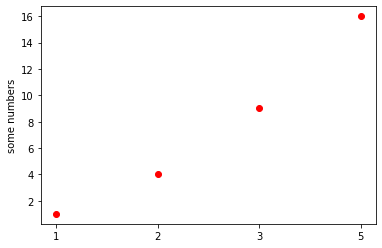

In [43]:
plt.plot(['1', '2', '3', '5'], [1, 4, 9, 16], 'ro')
plt.ylabel('some numbers')
plt.savefig("image01.png")
plt.show()

In [26]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime

In [57]:
def draw_pairs(ax, data_collection, facecolor='r', edgecolor='None', alpha=0.5 ):
    # draw pair stick
    for pp in data_collection:
        x = [pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx]
        y = [pp.ML[pp.index[0]].start.V, pp.ML[pp.index[0]].peak.V]
        ax.add_line(Line2D(x,y, lw=2, c='r'))
    
    # draw rectangle
    rect =[ Rectangle((pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]),
                      pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3] - pp.ccHL[2])
           for pp in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=alpha, edgecolor=edgecolor)
    ax.add_collection(pc)    
    return None


In [70]:
pp = m.PLv0_L[1]
pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx

(0.0, 4.0)

In [58]:
def draw_trends(ax, data_collection, linecolor='r',alpha = None ):
    lw = 0.5
    x = [pp.start.TmIdx for pp in data_collection]
    y = [pp.start.V for pp in data_collection]
    ax.add_line(Line2D(x,y, linewidth=lw, color=linecolor, alpha=alpha))
    
    return None

In [54]:
c = '2019-12-20'
r = 200

c_stp = dt_df['2019-12-20'].index.tolist()[0]
c_idx = int(dt_df.loc[c_stp,'TmIdx'])

s_idx = int(max(0, c_idx-r))
s_stp = dt_df.iloc[int(s_idx),:].name

e_idx = int(min(dt_df.shape[0], c_idx+r+1))
e_stp = dt_df.iloc[int(e_idx),:].name
c_idx, s_idx,s_stp, e_idx, e_stp

(11328,
 11128,
 Timestamp('2019-12-13 14:25:00'),
 11529,
 Timestamp('2019-12-26 10:20:00'))

s:11128,e:11529,len:402


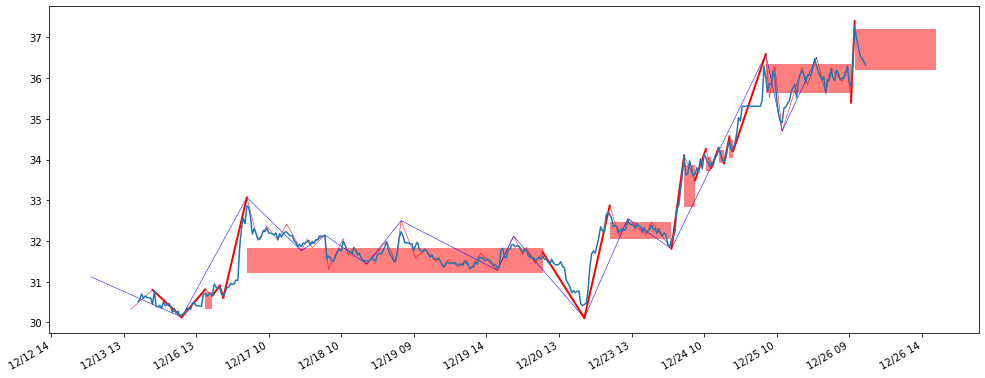

In [71]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

ydata = dt_df.loc[s_stp:e_stp,'close'].values
xdata = dt_df.loc[s_stp:e_stp,'TmIdx'].values
print("s:{0},e:{1},len:{2}".format(s_idx,e_idx,len(ydata)))

# format the ticks
tmLabel = dt_df.loc[s_stp:e_stp,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in dt_df.index]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int(len(ydata)/10)))

Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b')

pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)

ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.show()

In [65]:
data = dt_df[100:200]
data_up = data.query('open <= close')
data_down = data.query('open > close')

In [33]:
c = 16800
r = 200
s = max(0, c-r)
e = min(dt_df.shape[0], c+r)



(16896, 16600, 16896)

In [35]:
m.Lv0_L[0].start

Point(0.0, 6.0761, 0)

In [73]:
pp = m.PLv0_L[4]

In [82]:
[( (pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]), 
  pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx,
  pp.ccHL[3] - pp.ccHL[2]) 
 for pp in m.PLv0_L[1:5]]

[((10.0, 6.108679999999998), 32.0, 0.03257999999999761),
 ((19.0, 6.12846), 7.0, 0.014799999999999258),
 ((26.0, 6.12698), 0.0, 0.013319999999999332),
 ((33.0, 6.110639999999999), 9.0, 0.027169999999997252)]

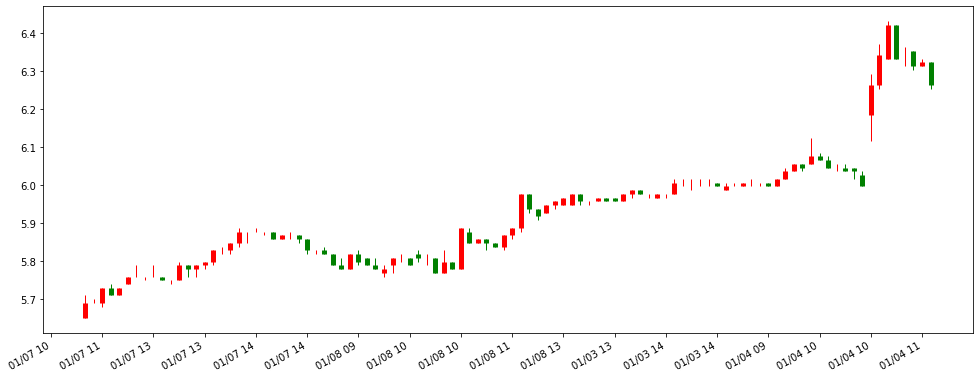

In [44]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.savefig("image01.png")
#plt.show()

In [39]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

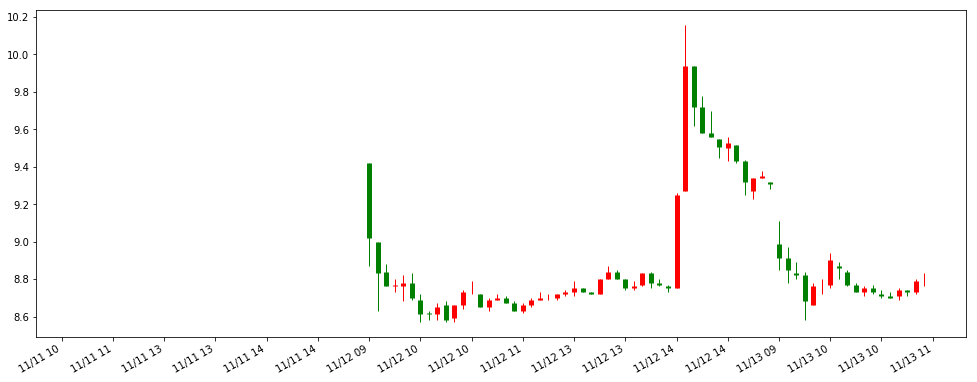

In [55]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [47]:
x_fmt[18]

'11/08 09'

In [30]:
dt_df[500:501].index

DatetimeIndex(['2019-01-16 11:15:00'], dtype='datetime64[ns]', name='datetime', freq=None)

In [53]:
dt_df.loc['2019-11-8 13':'2019-11-11']

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-11-08 13:05:00,8.4917,298455.0,8.5216,34900.0,8.5316,8.4917,9912
2019-11-08 13:10:00,8.4917,100629.0,8.4917,11800.0,8.5117,8.4917,9913
2019-11-08 13:15:00,8.4519,235933.0,8.4917,27700.0,8.5017,8.4519,9914
2019-11-08 13:20:00,8.5017,140669.0,8.4718,16500.0,8.5017,8.4718,9915
2019-11-08 13:25:00,8.4718,142117.0,8.5017,16700.0,8.5017,8.4718,9916
2019-11-08 13:30:00,8.4718,61256.0,8.4718,7200.0,8.4818,8.4718,9917
2019-11-08 13:35:00,8.4618,158850.0,8.4718,18700.0,8.4718,8.4618,9918
2019-11-08 13:40:00,8.4519,95925.0,8.4618,11300.0,8.4618,8.4519,9919
2019-11-08 13:45:00,8.4419,221965.0,8.4519,26200.0,8.4519,8.4220,9920


In [55]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [59]:
pd.core.index

<module 'pandas.core.index' from 'd:\\Users\\zhangyun29\\AppData\\Local\\Programs\\Python\\Python36-64\\lib\\site-packages\\pandas\\core\\index.py'>

In [38]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [27]:
def verity_valley_after_peak(lv_L):
    return True

In [39]:
verify_end_to_end(m.Lv1_L)

[[177.0, Point(192.0, 22.32, -1), Point(191.0, 22.26, 1)],
 [1668.0, Point(1679.0, 22.23, 1), Point(1676.0, 22.3, -1)],
 [1709.0, Point(1712.0, 21.74, -1), Point(1731.0, 21.68, -1)],
 [1946.0, Point(1949.0, 21.79, 1), Point(1968.0, 21.83, 1)],
 [1968.0, Point(1975.0, 21.85, 1), Point(1977.0, 21.95, -1)],
 [2464.0, Point(2504.0, 22.35, -1), Point(2491.0, 22.44, -1)],
 [2583.0, Point(2592.0, 22.15, -1), Point(2615.0, 22.15, -1)],
 [2792.0, Point(2803.0, 22.09, 1), Point(2851.0, 22.12, 1)],
 [2851.0, Point(2882.0, 22.18, -1), Point(2865.0, 22.26, -1)],
 [2865.0, Point(2873.0, 22.19, -1), Point(2884.0, 22.02, 1)],
 [3931.0, Point(3970.0, 22.71, 1), Point(3954.0, 22.63, 1)],
 [4589.0, Point(4594.0, 23.31, -1), Point(4596.0, 23.22, 1)],
 [5306.0, Point(5311.0, 24.3, 1), Point(5310.0, 24.34, -1)],
 [5364.0, Point(5373.0, 24.35, -1), Point(5371.0, 24.19, 1)],
 [5371.0, Point(5400.0, 24.39, -1), Point(5382.0, 24.44, -1)],
 [5382.0, Point(5393.0, 24.4, -1), Point(5399.0, 24.3, 1)],
 [5532.0, Poi

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [36]:
tmIdx = 15929


In [33]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [37]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

((1904, Stick(drt:1, lv:0, Point(15927.0, 33.11, 1))),
 (392, Trend1(1, 2, Point(15927.0, 33.11, 1))),
 (86, Trend2(1, 2, Point(15927.0, 33.11, 1))))

In [35]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [94]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [31]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [32]:
draw_k(15027,500)

AttributeError: 'str' object has no attribute 'get'

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [102]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


### draw Pair

In [105]:
p = find_pair(tmIdx,0)[1]
p.__dict__

{'P': 33.61,
 'S': 33.11,
 'TmS': 15927.0,
 'cc': 0.55,
 'ccHL': (7, 18, 33.28499999999999, 33.559999999999974),
 'chain_layer': 2,
 'core': 33.50999999999998,
 'core_index': 16,
 'drt': 1,
 'his': [[33.11,
   33.135,
   33.16,
   33.184999999999995,
   33.209999999999994,
   33.23499999999999,
   33.25999999999999,
   33.28499999999999,
   33.30999999999999,
   33.33499999999999,
   33.359999999999985,
   33.384999999999984,
   33.40999999999998,
   33.43499999999998,
   33.45999999999998,
   33.48499999999998,
   33.50999999999998,
   33.534999999999975,
   33.559999999999974,
   33.58499999999997,
   33.61],
  array([0.2       , 0.53333333, 0.53333333, 0.78333333, 0.45      ,
         0.25      , 0.45      , 0.2       , 0.2       , 0.2       ,
         0.84285714, 1.04285714, 0.54285714, 0.34285714, 0.25396825,
         0.97619048, 1.33730159, 0.69444444, 0.69444444, 0.47222222])],
 'index': [1904, 1905],
 'status': 1}

In [186]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [187]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

Point(15927.0, 33.11, 1)

In [188]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

Point(15936.0, 33.36, 1)

In [189]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


In [190]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,NaN,NaN,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,NaN,NaN,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,NaN,NaN,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,NaN,NaN,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,NaN,NaN,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,NaN,NaN,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,NaN,NaN,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,NaN,NaN,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,NaN,NaN,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,NaN,NaN,33.25,33.36,33.23,33.25


In [191]:
df_p

,TmIdx,V
0,15927,33.110000
2,15928,33.137778
3,15929,33.165556
4,15930,33.193333
5,15931,33.221111
6,15932,33.248889
7,15933,33.276667
8,15934,33.304444
9,15935,33.332222
1,15936,33.360000


In [193]:
df_draw.fillna('', inplace=True)
df_draw

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,,,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,,,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,,,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,,,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,,,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,,,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,,,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,,,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,,,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,,,33.25,33.36,33.23,33.25


In [201]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [198]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [199]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [200]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)